## IMPORTING DATA

In [33]:
import numpy as np
import pandas as pd
import sklearn 
import statsmodels.api as sm
from sklearn.cluster import k_means
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## READ DATA

In [34]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [35]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
train.shape

(42000, 785)

In [37]:
(train.isnull().sum()).value_counts() # no null values

0    785
dtype: int64

In [38]:
y_train=train['label']
x_train=train.drop('label',axis=1)

In [39]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [40]:
x_train.shape

(42000, 784)

In [41]:
train.shape

(42000, 785)

In [42]:
y_test=train['label']
x_test=train.drop('label',axis=1)

In [43]:
x_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y_test.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [45]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [46]:
from sklearn.decomposition import PCA
pca=PCA(random_state=42)

In [47]:
pca.fit_transform(x_train_scaled,y_train)

array([[-5.14047772e+00, -5.22644540e+00,  3.88700075e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.92923323e+01,  6.03299601e+00,  1.30814797e+00, ...,
        -1.05964850e-15,  3.00039008e-15, -1.91106485e-15],
       [-7.64450341e+00, -1.70581328e+00,  2.28932646e+00, ...,
        -1.99075793e-15,  3.09160840e-15, -1.87908622e-15],
       ...,
       [ 4.95391370e-01,  7.07627667e+00, -1.20896995e+01, ...,
        -2.75240758e-17,  3.63928461e-18,  6.63636662e-18],
       [ 2.30724011e+00, -4.34451279e+00,  6.99847802e-01, ...,
        -3.08799631e-17, -2.06613036e-17,  7.73758668e-18],
       [-4.80767022e+00,  1.55912058e+00, -2.49793585e+00, ...,
        -8.68609132e-18, -1.43608381e-17,  1.57110002e-17]])

In [48]:
cumsum=np.cumsum(pca.explained_variance_ratio_)

In [49]:
cumsum

array([0.05747953, 0.09859644, 0.13642512, 0.16582374, 0.19138813,
       0.21368657, 0.2332121 , 0.25092815, 0.26655475, 0.28080431,
       0.2944144 , 0.3066398 , 0.31799717, 0.32912807, 0.33963118,
       0.34975443, 0.35926746, 0.36861261, 0.37768519, 0.38653847,
       0.39492754, 0.40304781, 0.41079942, 0.41832254, 0.42559944,
       0.432587  , 0.43949155, 0.44614078, 0.45244753, 0.45861055,
       0.46471977, 0.47069014, 0.47646297, 0.4821998 , 0.48784802,
       0.49331123, 0.49870554, 0.50394915, 0.50899758, 0.51388288,
       0.51870532, 0.52346433, 0.52806441, 0.53264069, 0.53713653,
       0.54160375, 0.54604212, 0.55041049, 0.55473762, 0.55900789,
       0.56320058, 0.56732239, 0.57134699, 0.57534133, 0.57929025,
       0.5831983 , 0.58699728, 0.59072182, 0.59440595, 0.59806318,
       0.60159596, 0.60510684, 0.60856097, 0.61197491, 0.61535276,
       0.61871752, 0.62203462, 0.62533187, 0.62853203, 0.63169979,
       0.63482674, 0.63794535, 0.64102748, 0.64406024, 0.64707

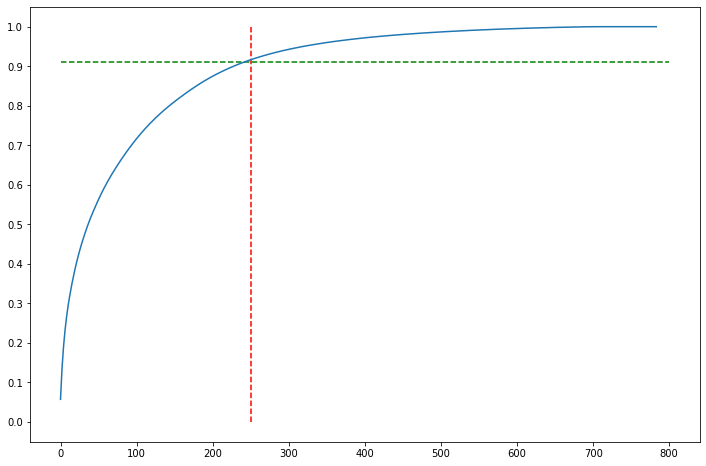

In [50]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=250, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.91, xmax=800, xmin=0, colors="g", linestyles="--")
sns.lineplot(y=cumsum,x=range(len(cumsum)))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

In [51]:
from sklearn.decomposition import IncrementalPCA

In [52]:
pca=IncrementalPCA(n_components=250)
x_train_pca=pca.fit_transform(x_train_scaled)

In [53]:
cumsum=np.cumsum(pca.explained_variance_ratio_)

In [54]:
cumsum

array([0.05747952, 0.09859638, 0.13642501, 0.16582359, 0.19138795,
       0.21368632, 0.2332117 , 0.25092765, 0.26655408, 0.28080345,
       0.29441336, 0.30663837, 0.31799552, 0.32912625, 0.33962896,
       0.34975187, 0.35926426, 0.36860909, 0.37768096, 0.38653317,
       0.3949213 , 0.40304096, 0.41079197, 0.41831456, 0.42559033,
       0.43257682, 0.43947988, 0.44612698, 0.4524318 , 0.45859162,
       0.46469927, 0.47066847, 0.47643795, 0.48217409, 0.48782018,
       0.49328173, 0.49867375, 0.50391643, 0.50896179, 0.51384477,
       0.51866444, 0.52342084, 0.52801799, 0.53259176, 0.53708524,
       0.54154913, 0.54598603, 0.55035132, 0.5546731 , 0.55893933,
       0.56312988, 0.56724912, 0.57126912, 0.57526019, 0.57920687,
       0.58311132, 0.58690603, 0.59062743, 0.59430741, 0.59795732,
       0.60148563, 0.60499155, 0.60843703, 0.61184455, 0.61521717,
       0.61857347, 0.62188523, 0.62517418, 0.62836739, 0.63152778,
       0.63464895, 0.63776239, 0.64083802, 0.64386112, 0.64686

In [55]:
x_train_final=pd.DataFrame(x_train_pca)

In [56]:
x_train_final.head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,-5.140477,-5.226468,3.886991,0.901554,-4.929063,2.035396,-4.707070,-4.767223,0.230824,-1.461174,...,-0.032888,0.758930,0.113027,-0.214480,0.087568,0.458328,0.266982,-0.177202,0.025569,0.232638
1,19.292332,6.033029,1.308170,2.383256,-3.095249,-1.791090,3.773000,0.154027,-4.115206,-4.299037,...,-0.269909,0.287691,-0.474057,0.132471,0.356589,-0.262992,0.680702,0.556077,-0.602038,-0.261185
2,-7.644499,-1.705798,2.289327,-2.241142,-5.094477,-4.152081,1.012019,1.732595,0.436202,-0.073526,...,0.634648,-0.284925,0.090322,0.082116,0.348040,0.007318,-0.401325,-0.894845,-0.228741,-0.010822
3,-0.474249,5.836091,2.008598,-4.271167,-2.377729,2.179875,-4.397944,-0.353640,0.991715,5.501532,...,0.567852,0.938572,-0.199528,-0.435639,0.321724,1.100357,1.655579,-0.271283,0.844534,-1.195976
4,26.559579,6.024807,0.933168,3.012646,-9.489092,-2.331205,6.149654,-1.783677,-4.123184,-5.757634,...,-0.556693,1.692625,-0.329418,-0.695266,0.581043,-0.542094,0.934397,0.599890,0.107686,-0.296380


In [57]:
train_final_df=pd.concat([y_train,x_train_final],axis=1)

In [58]:
x_test_pca=pca.transform(x_test_scaled)

In [59]:
x_test_final=pd.DataFrame(x_test_pca)

In [60]:
test_final_df=pd.concat([y_test,x_test_final],axis=1)

In [61]:
test_final_df.head()

,label,0,1,2,3,4,5,6,7,8,...,240,241,242,243,244,245,246,247,248,249
0,1,-5.140477,-5.226468,3.886991,0.901554,-4.929063,2.035396,-4.707070,-4.767223,0.230824,...,-0.032888,0.758930,0.113027,-0.214480,0.087568,0.458328,0.266982,-0.177202,0.025569,0.232638
1,0,19.292332,6.033029,1.308170,2.383256,-3.095249,-1.791090,3.773000,0.154027,-4.115206,...,-0.269909,0.287691,-0.474057,0.132471,0.356589,-0.262992,0.680702,0.556077,-0.602038,-0.261185
2,1,-7.644499,-1.705798,2.289327,-2.241142,-5.094477,-4.152081,1.012019,1.732595,0.436202,...,0.634648,-0.284925,0.090322,0.082116,0.348040,0.007318,-0.401325,-0.894845,-0.228741,-0.010822
3,4,-0.474249,5.836091,2.008598,-4.271167,-2.377729,2.179875,-4.397944,-0.353640,0.991715,...,0.567852,0.938572,-0.199528,-0.435639,0.321724,1.100357,1.655579,-0.271283,0.844534,-1.195976
4,0,26.559579,6.024807,0.933168,3.012646,-9.489092,-2.331205,6.149654,-1.783677,-4.123184,...,-0.556693,1.692625,-0.329418,-0.695266,0.581043,-0.542094,0.934397,0.599890,0.107686,-0.296380


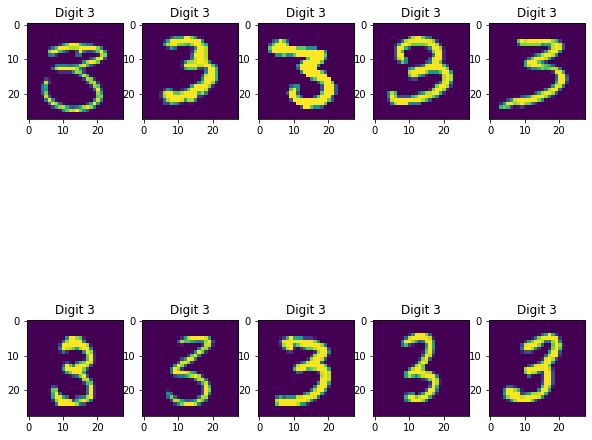

In [65]:
plt.figure(figsize=[10,10])
img_three = train.loc[train['label']==3].head(10).index.values
for i in range(0,10):
    one = train.iloc[img_three[i], 1:]
    one = one.values.reshape(28,28)
    plt.subplot(2,5,i+1)
    plt.imshow(one)
    plt.title("Digit 3")

In [66]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [67]:
folds=KFold(n_splits=3,shuffle=True,random_state=42)

In [68]:
svc=SVC(kernel='linear')
svc.fit(x_train_final,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [69]:
y_pred=svc.predict(x_test_final)

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
matrix=confusion_matrix(y_true=y_test,y_pred=y_pred)

In [71]:
matrix

array([[4114,    0,    1,    1,    0,    5,    6,    0,    5,    0],
       [   0, 4669,    3,    1,    0,    0,    0,    0,   11,    0],
       [   4,   15, 4050,   27,   23,    6,    9,   13,   26,    4],
       [   4,    5,   71, 4123,    1,   74,    2,    8,   49,   14],
       [   2,    6,   13,    0, 3978,    0,    3,    3,    0,   67],
       [  14,    6,   18,   96,   11, 3592,   16,    0,   37,    5],
       [   9,    1,   10,    1,    8,   22, 4080,    0,    6,    0],
       [   0,    5,   32,    8,   19,    1,    0, 4268,    2,   66],
       [  12,   41,   30,   65,    2,   61,    6,    3, 3831,   12],
       [   7,   12,    4,   27,   81,   11,    0,   94,   17, 3935]],
      dtype=int64)

In [72]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred)

0.9676190476190476

In [44]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)      

In [46]:
# fit the model - it will fit 5 folds across all values of C
model_cv.fit(x_train_final, y_train)  

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 97.4min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [47]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,267.095506,59.645548,105.914407,21.451829,0.1,{'C': 0.1},0.877000,0.880643,0.876500,0.878048,0.001846,5,0.892786,0.892464,0.890000,0.891750,0.001244
1,175.328610,9.298873,73.654061,0.668081,1,{'C': 1},0.948857,0.948714,0.950429,0.949333,0.000777,4,0.994821,0.995571,0.994929,0.995107,0.000331
2,159.195723,2.670819,62.263196,1.926841,10,{'C': 10},0.953143,0.953500,0.955071,0.953905,0.000838,1,0.999964,0.999929,0.999929,0.999940,0.000017
3,154.643255,2.050095,60.401461,0.541274,100,{'C': 100},0.953071,0.953500,0.954929,0.953833,0.000794,2,1.000000,1.000000,1.000000,1.000000,0.000000
4,151.612297,1.417815,59.837376,0.844128,1000,{'C': 1000},0.953071,0.953500,0.954929,0.953833,0.000794,2,1.000000,1.000000,1.000000,1.000000,0.000000


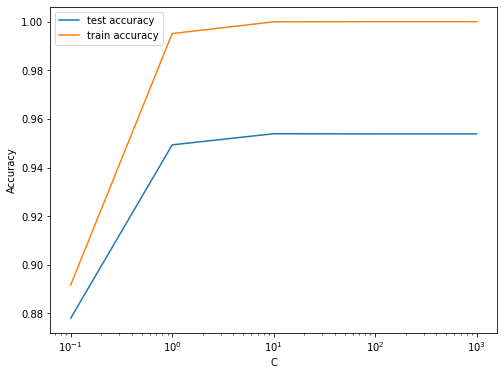

In [48]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [49]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.9539047619047619 at C = 10
